In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
desafio1 = pd.read_csv('2DTAT_Challenge1_Excel.csv', encoding='ISO-8859-1', sep=';', thousands='.', decimal=',' )

* Busque pela documentação "pandas.read_csv" para te ajudar na correções.

In [4]:
desafio1.head()

,ï»¿mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [5]:
desafio1.rename(columns={'ï»¿mpg': 'mpg'}, inplace=True)

In [6]:
desafio1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
401,27.0,4.0,140.0,860.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,970.0,520.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,840.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,790.0,2625.0,18.6,82.0,1.0,ford ranger
405,31.0,4.0,119.0,820.0,2720.0,19.4,82.0,1.0,chevy s-10


 **1. Qual a dimensão do dataset inicialmente em (linhas, colunas)?**
1. (390,9)

2. **(406,9)**

3. (406,8)

4. (405,9)

5. (390,7)


In [7]:
desafio1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [8]:
desafio1.shape

(406, 9)

**2. Em uma análise de dados, é muito comum fazermos as limpezas dos valores nulos
para que consigamos analisar principalmente dados numéricos, onde podemos
substituir os valores nulos por algum valor que deixe os dados mais próximos da
realidade, ou simplesmente excluir as linhas onde eles estão. Se optarmos excluir as
linhas com valores nulos em qualquer coluna para que possamos, nosso dataset
passará a ter quantas linhas?**
1. 401
2. 400
3. **392**
4. 350
5. 399

Resposta: 8+6=14 -- 406-14=392

In [9]:
desafio1.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

**3. Se quisermos carregar o dataset via python, precisaremos da biblioteca "pandas".
Qual a sintaxe correta para essa ação?**
1. pd.to_excel('auto-mpg-original.csv', sep = ';')
2. pd.to_csv('auto-mpg-original.csv', sep = ';')
3. pd.read_csv('auto-mpg-original.csv', sep = ' , ')
4. pd.read_excel('auto-mpg-original.csv', sep = ' , ')
5. **pd.read_csv('auto-mpg-original.csv', sep = ' ; ')**


**4. Olhando para o ano de fabricação, qual ano corresponde a carros com maior
economia de milhas por galão (mpg) ?**
1. 78
2. 75
3. 72
4. **80**
5. 79


In [11]:
media_mpg_por_ano = desafio1.groupby('model year')['mpg'].mean()

In [12]:
ano_max_mpg = media_mpg_por_ano.idxmax()
max_mpg = media_mpg_por_ano.max()

In [13]:
print(f'Ano com maior média de mpg: {ano_max_mpg} com {max_mpg:.2f} mpg')

Ano com maior média de mpg: 80.0 com 296.62 mpg


**informações:** 
    
**O intervalo interquartil, frequentemente abreviado como IQR (do inglês Interquartile Range), 
é uma medida estatística que descreve a dispersão ou a variação dos dados em um conjunto. 
Ele é calculado a partir dos quartis de um conjunto de dados e é usado principalmente para avaliar 
a dispersão dos valores em torno da mediana.**

**Quartis são valores que dividem um conjunto de dados ordenado em quatro partes iguais, representando 
os percentis 25%, 50% (que é a mediana) e 75% dos dados. O intervalo interquartil é a diferença entre 
o terceiro quartil (Q3, que é o valor aos 75%) e o primeiro quartil (Q1, que é o valor aos 25%).**

**A fórmula para calcular o intervalo interquartil é:**

- IQR=Q3−Q1

**Onde:**
- Q1 é o primeiro quartil (25% dos dados estão abaixo deste valor).
- Q3 é o terceiro quartil (75% dos dados estão abaixo deste valor).

**O IQR é uma medida de dispersão robusta, o que significa que ele não é sensível a valores extremos (outliers) no conjunto de dados, ao contrário do desvio padrão, por exemplo. É útil para identificar a amplitude na qual a maioria dos dados está concentrada, permitindo detectar a presença de valores atípicos ou discrepantes.**

**Em termos simples, o IQR fornece uma noção de quão espalhados os valores do conjunto de dados estão na região intermediária, onde a maioria dos dados está localizada, ignorando valores extremos que podem distorcer outras medidas de dispersão mais sensíveis.**

**5. No intervalo interquartil, diga o valor para o 3º quartil da coluna "horsepower"**
1. **840**
2. 650
3. 320
4. 780
5. 575

In [14]:
# Calcular o primeiro quartil (Q1) da coluna "horsepower"
Q1 = desafio1["horsepower"].quantile(0.25)

# Calcular o terceiro quartil (Q3) da coluna "horsepower"
Q3 = desafio1["horsepower"].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

print(f"Terceiro quartil (Q3) da coluna 'horsepower': {Q3:.2f}")
print(f"Intervalo interquartil (IQR): {IQR:.2f}")

Terceiro quartil (Q3) da coluna 'horsepower': 830.00
Intervalo interquartil (IQR): 685.00


**6. Após a limpeza dos dados(dropar as linhas com valores nulos), quantos tipos de
carros distintos nós temos em nossa base?**
1. 300
2. **301**
3. 302
4. 310
5. 305

In [15]:
desafio1_limpo = desafio1.dropna()

In [16]:
desafio1_limpo.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [17]:
desafio1_limpo.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

**7. Qual o desvio padrão aproximado da coluna "mpg"?**
1. 27.2
2. 10.2
3. **7.8**
4. 23.4
5. 25


In [18]:
## O float está alterando o valor
desafio1['mpg'].std()

125.78974897444009

**8. Qual o valor da correlação entre as colunas "cylinders" e "weight"? Obs: Considere
o coeficiente de correlação de Pearson**
1. 0.4
2. 0.7
3. 0.2
4. 0.5
5. **0.9**

In [20]:
correlacao_cylinders_weight = desafio1['cylinders'].corr(desafio1['weight'])

In [21]:
print(f"Correlação entre as colunas 'cylinders' e 'weight': {correlacao_cylinders_weight:.2f}")

Correlação entre as colunas 'cylinders' e 'weight': 0.90


**9. Qual a função nativa do pandas que modifica o tipo de dado um uma coluna do
dataframe?**
1. dtype( )
2. **astype( )**
3. type( )
4. to_type( )
5. value( )


**10. O z-score é uma métrica estatística fundamental para análise de dados, e sua
equação é dada abaixo. Qual o significado do z-score?**

Z = (X - U)/Q

1. Determinar o tipo de distribuição do dado
2. Identificar Outliers
3. Calcular a discrepência estatística
4. **Verificar o quão distante em desvios padrões os dados estão em relação à média.**
5. Achar uma tendência média em torno da variância

**11. Quando fazemos a correlação da variáveis, os valores negativos representam o
que?**
1. **A relação das variáveis são inversamente proporcionais**
2. A relação das variáveis são diretamente proporcionais
3. A relação das variáveis possuem correlações fracas
4. Todas as variáveis estão correlacionadas diretamente


**12. Quando montamos um gráfico para comparar qual o ano dos carros
apresentaram uma maior economia no mpg, qual ano mostrou o maior desempenho?**
1. 70
2. 82
3. 75
4. **80**


In [23]:
# Encontrar o ano com a maior média de mpg
media_mpg_por_ano = desafio1.groupby('model year')['mpg'].mean()
ano_max_mpg = media_mpg_por_ano.idxmax()
max_mpg = media_mpg_por_ano.max()

In [24]:
# Encontrar o ano com o maior desempenho (maior valor de acceleration)
ano_max_desempenho = desafio1.groupby("model year")["acceleration"].max().idxmax()
max_desempenho = desafio1.groupby("model year")["acceleration"].max().max()

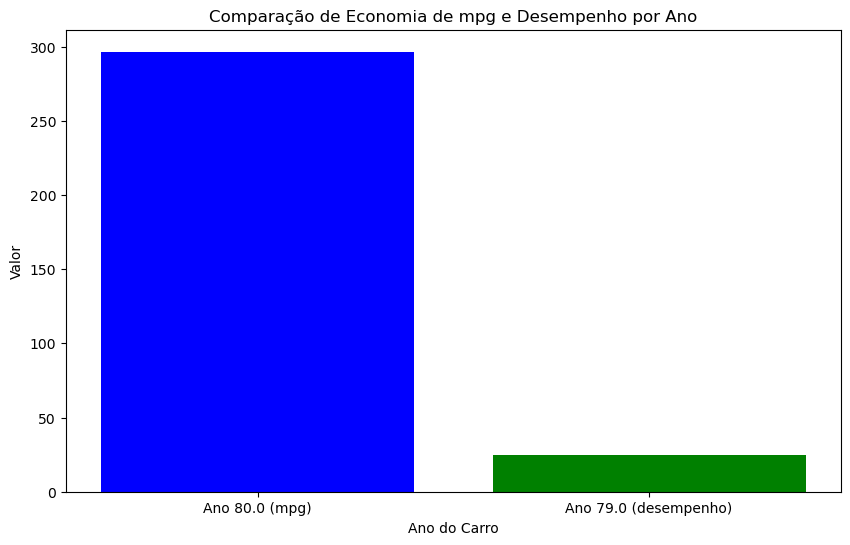

In [25]:
# Criar um gráfico de barras para comparar os anos de acordo com a economia de mpg e desempenho
plt.figure(figsize=(10, 6))
plt.bar([f"Ano {ano_max_mpg} (mpg)", f"Ano {ano_max_desempenho} (desempenho)"], [max_mpg, max_desempenho], color=['blue', 'green'])
plt.xlabel("Ano do Carro")
plt.ylabel("Valor")
plt.title("Comparação de Economia de mpg e Desempenho por Ano")
plt.show()

**13.Os valores nulos dentro de um conjuto de dados sempre atrapalham na
visualização e na compreensão das nossas análises. Qual função do pandas identifica
que há dados nulos no dataset?**
1. **.isnull()**
2. .not_null()
3. <>
4. .to_null()

In [26]:
desafio1.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

**14.Muitas das vezes quando precisamos entender a tendencia de como está sendo a
evolução dos carros analisados, utilizamos um determinado tipo de gráfico. Qual
gráfico utilizamos?**
1. Dispensão
2. **Linha**
3. Barra
4. Gráfico de Caixa

In [27]:
# Agrupar os dados por ano e calcular a média do consumo de combustível (mpg) para cada ano
media_mpg_por_ano = desafio1.groupby('model year')['mpg'].mean()

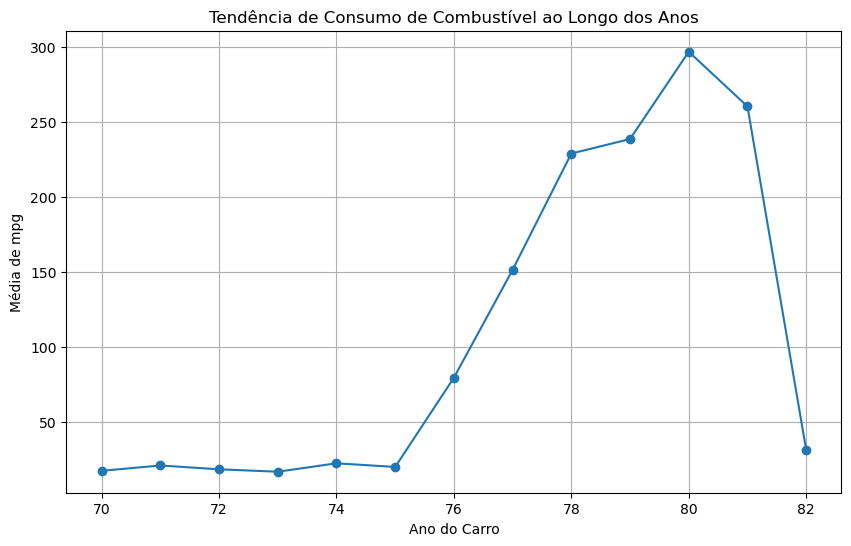

In [28]:
# Criar um gráfico de linhas para mostrar a tendência de consumo de combustível ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(media_mpg_por_ano.index, media_mpg_por_ano.values, marker='o')
plt.xlabel("Ano do Carro")
plt.ylabel("Média de mpg")
plt.title("Tendência de Consumo de Combustível ao Longo dos Anos")
plt.grid(True)
plt.show()

**15.Observando o gráfico abaixo, qual das qual das cilindradas há a maior economia
de combustível?**

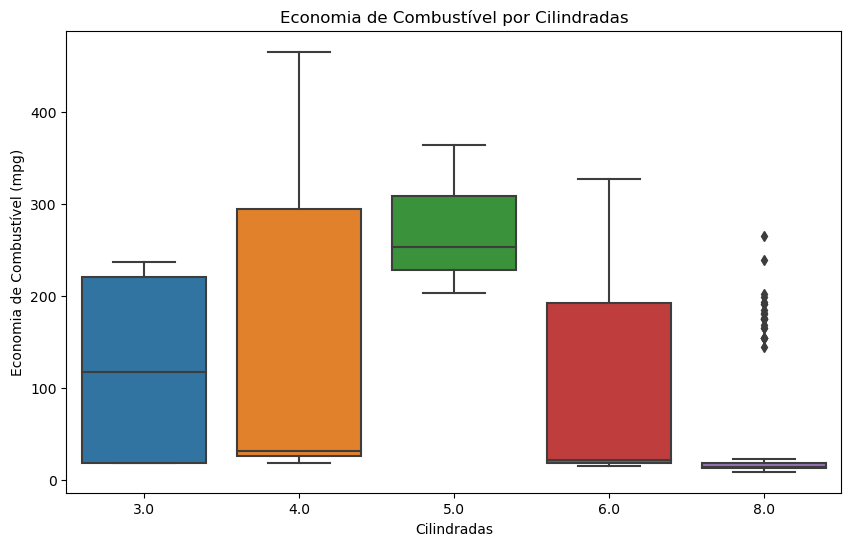

In [30]:
# Criar um boxplot usando Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='cylinders', y='mpg', data=desafio1)
plt.xlabel("Cilindradas")
plt.ylabel("Economia de Combustível (mpg)")
plt.title("Economia de Combustível por Cilindradas")
plt.show()

**16.Olhando para o código em python, o que está sendo codado em nosso notebook?**

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)<br>
fig df['mpg'].hist(bins=20)<br>
fig.set.xlabel('mpg')<br>
fig.set_ylabel('número de casos')<br>

plt.subplot(4, 2, 2)<br>
fig df['cylinders'].hist(bins=20)<br>
fig.set.xlabel('cylinders')<br>
fig.set_ylabel('número de casos')<br>

plt.subplot(4, 2, 3)<br>
fig df['displacement'].hist(bins=20)<br>
fig.set.xlabel('displacement')<br>
fig.set_ylabel('número de casos')<br>

plt.subplot(4, 2, 4)<br>
fig df['horsepower'].hist(bins=20)<br>
fig.set.xlabel('horsepower')<br>
fig.set_ylabel('número de casos')<br>

plt.subplot(4, 2, 5)<br>
fig df['weight'].hist(bins=20)<br>
fig.set.xlabel('weight')<br>
fig.set_ylabel('número de casos')<br>

plt.subplot(4, 2, 6)<br>
fig df['acceleration'].hist(bins=20)<br>
fig.set.xlabel('acceleration')<br>
fig.set_ylabel('número de casos')<br>

plt.subplot(4, 2, 7)<br>
fig df['model year'].hist(bins=20)<br>
fig.set.xlabel('model year')<br>
fig.set_ylabel('número de casos')<br>

plt.subplot(4, 2, 8)<br>
fig df['origin'].hist(bins=20)<br>
fig.set.xlabel('origin')<br>
fig.set_ylabel('número de casos')<br>

1. Construção de um modelo de Machine Learning de Regressão
2. **Construção de gráficos de barras**
3. Verificando há exististencias de valores correlatos e separando um grande grupos
4. Construção de um modelo de Deep Learning - redes convolucionais


**17. No python, se quiser colocar uma coluna a mais para dentro do dataframe e
adicionar o nome do país nesta coluna, como fazer?**
1. **df['cod_pais'] = df.origin.replace([1,2,3],['EUA','Europa','Japão'])**
2. df['cod_pais'] = df.origin.add([1,2,3],['EUA','Europa','Japão'])
3. df.add['cod_pais'] = df.replace([1,2,3],['EUA','Europa','Japão'])
4. df['cod_pais'] = df.origin([1,2,3],['EUA','Europa','Japão'])


**18. Qual a função nativa do pandas que faz a contagem distinta de valores em uma
coluna ou no dataframe todo?**
1. sort( )
2. agg( )
3. sum( )
4. **value_counts( )**
5. count( )

**19. Dentro do nosso dataset, queremos saber quantos carros temos e iremos analisar.
Quantos carros temos no nosso conjunto de dados?**
1. 406
2. **312**
3. 13
4. 83

**20. Qual a função do pandas que utilizamos para evitar que a o índice de um
dataframe vire uma coluna após uma modificação?**
1. **reset_index(drop=True)**
2. remove_index(True)
3. drop_index(drop_index=True)
4. sort_index(True)